In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib

In [2]:
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #print(faces)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
        #print(face)
        landmarks = predictor(gray, face)
        
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)
        

    cv2.imshow("Frame", frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

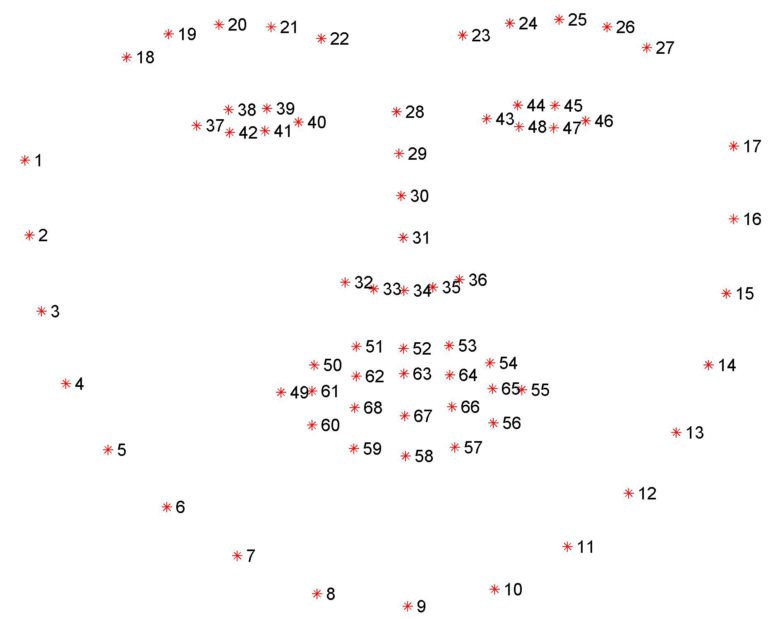

In [3]:
#2-6 
#12-16
#30-68

In [6]:


#cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

imageFilename ="mask.jpg"
img= cv2.imread(imageFilename)
#cv2.imshow('img',img)

#print(faces)


scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
faces = detector(img)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)

            
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)


    
    
    
    for n in range(0, 35):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        print(n,x,y)

        
cv2.imshow('img',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()


0 460 378
1 460 423
2 465 467
3 472 510
4 487 550
5 515 584
6 550 609
7 587 632
8 624 640
9 664 639
10 704 619
11 741 592
12 772 558
13 795 521
14 809 478
15 816 435
16 818 390
17 490 354
18 519 344
19 552 344
20 584 354
21 613 370
22 674 369
23 703 355
24 734 346
25 766 346
26 791 358
27 642 408
28 641 446
29 639 484
30 637 521
31 602 528
32 618 536
33 635 543
34 652 538


In [ ]:
#1#460 423
#15#816 435
#8 624 640


In [5]:
#2-6 
#12-16
#30-68

In [18]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib
def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #print(faces)
    l=[]
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        landmarks = predictor(gray, face)
        
        for n in range(1, 16):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            #cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)
            l.append((x,y))
#         for n in range(28, 36):
#             x = landmarks.part(n).x
#             y = landmarks.part(n).y
#             cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)
#             l.append((x,y))
    if len(l)!=0:
    
        lefteye=l[0:15]
    #     righteye=l[18:26]
        lefteye=np.array(lefteye)
        #righteye=np.array(righteye)
        #print(lefteye)
        #Taking convex hull of both eyes
        leftEyeHull = cv2.convexHull(lefteye)
        #rightEyeHull = cv2.convexHull(righteye)        
#         frame1=frame
#         hull = cv2.fillPoly(frame1, [leftEyeHull], (255, 255, 255))
        
        #src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
        M1 = cv2.moments(leftEyeHull)
        cX1 = int(M1["m10"] / M1["m00"])
        cY1 = int(M1["m01"] / M1["m00"])
        
        center1=(cX1,cY1)
            
        #Reading the image contaning anime eyes
        src = cv2.imread('mask_only.jpg')
        #src = cv2.bilateralFilter(src, 3, 175, 175)

        #Creating a mask of same size as the src image
        src_mask = np.zeros(src.shape, src.dtype)
        #Specifying the roi of the image for left eye

        poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
                 ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
                 [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
                 [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
                ,[216,86],[130,68],[78,44]], np.int32)
        src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

    #Scale the image to your eye size
        scale_percent = 20 # percent of original size
        width = int(src.shape[1] * scale_percent / 100)
        height = int(src.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
        src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)

        output = cv2.seamlessClone(src,frame , src_mask, center1, cv2.NORMAL_CLONE)
        
        #leftEyeHull
        

#         gamma = 1.8  # change the value here to get different result
#         adjusted_output = adjust_gamma(output, gamma=gamma)



        #frame = cv2.fillPoly(frame, [leftEyeHull], (255, 255, 255))
       # cv2.imshow("colour", hull)
        cv2.imshow("adjusted_output", output)
       # cv2.imshow("final", final)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [5]:
#leftEyeHull

In [11]:
src = cv2.imread('mask_only.jpg')
#src = cv2.bilateralFilter(src, 3, 175, 175)
src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
                 ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
                 [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
                 [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
                ,[216,86],[130,68],[78,44]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

In [29]:
src = cv2.imread('mask_only.jpg')
cv2.imshow('img',src)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [ ]:
poly = np.array([ [55,29], [64,141], [56,244], [43,311], [87,391], [143,463],[195,533],[232,574], [325,633]
                 ,,[391,650],[466,655],[522,655],[620,630],[684,596],[727,555],[760,515],
                 [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
                 [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
                ,[216,86],[130,68],[78,44]], np.int32)

In [4]:
src = cv2.imread('blackre.jpg')
cv2.imshow('img',src)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [8]:
src = cv2.imread('blackre (another copy).jpg')
cv2.imshow('img',src)


src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([ [22,42], [33,247], [98,342], [152,389] ],np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
masked = cv2.bitwise_and(src_mask, src)
cv2.imshow('masked',masked)
cv2.imshow('src_mask',src_mask)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [16]:
import cv2
import numpy as np
src = cv2.imread('mask_only.jpg')



src_mask = np.zeros(src.shape, src.dtype)
#Specifying the roi of the image for left eye
poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
         ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
         [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
         [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
        ,[216,86],[130,68],[78,44]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
masked = cv2.bitwise_and(src_mask, src)


cv2.imshow('mask', masked)

cv2.imshow('src_mask', src_mask)    #alpha channel
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [17]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib
def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #print(faces)
    l=[]
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        landmarks = predictor(gray, face)
        
        for n in range(1, 16):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            #cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)
            l.append((x,y))
#         for n in range(28, 36):
#             x = landmarks.part(n).x
#             y = landmarks.part(n).y
#             cv2.circle(frame, (x, y), 2, (255, 0, 0), -1)
#             l.append((x,y))
    if len(l)!=0:
    
        lefteye=l[0:15]
    #     righteye=l[18:26]
        lefteye=np.array(lefteye)
        #righteye=np.array(righteye)
        #print(lefteye)
        #Taking convex hull of both eyes
        leftEyeHull = cv2.convexHull(lefteye)
        #rightEyeHull = cv2.convexHull(righteye)        

        M1 = cv2.moments(leftEyeHull)
        cX1 = int(M1["m10"] / M1["m00"])
        cY1 = int(M1["m01"] / M1["m00"])
        
        center1=(cX1,cY1)
            
        #Reading the image contaning anime eyes
        src = cv2.imread('blackre.jpg')
        #src = cv2.bilateralFilter(src, 3, 175, 175)
        src = cv2.bilateralFilter(src, 3, 175, 175)
        #Creating a mask of same size as the src image
        src_mask = np.zeros(src.shape, src.dtype)
        #Specifying the roi of the image for left eye

        poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
         ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
         [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
         [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
        ,[216,86],[130,68],[78,44]], np.int32)
        src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

    #Scale the image to your eye size
        scale_percent = 23 # percent of original size
        width = int(src.shape[1] * scale_percent / 100)
        height = int(src.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
        src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)

        output = cv2.seamlessClone(src,frame , src_mask, center1, 3)
        

        
        gamma = 1.8  # change the value here to get different result
        adjusted_output = adjust_gamma(output, gamma=gamma)



        #frame = cv2.fillPoly(frame, [leftEyeHull], (255, 255, 255))
       
        cv2.imshow("adjusted_output", adjusted_output)
       # cv2.imshow("final", final)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Reading the image contaning anime eyes
src = cv2.imread('mask_only.jpg')
#src = cv2.bilateralFilter(src, 3, 175, 175)

#Creating a mask of same size as the src image
src_mask = np.zeros(src.shape, src.dtype)


In [7]:
# Import libraries
import cv2
import numpy as np

import os
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

image Dimension =(200, 300, 3)


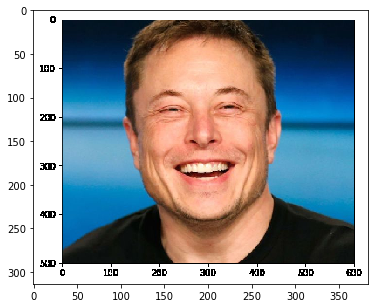

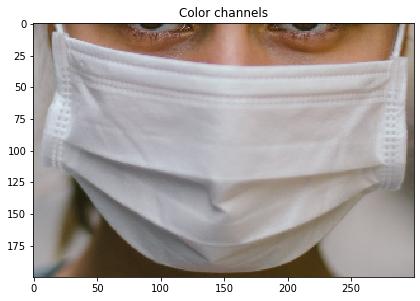

In [13]:
# Load the Face Image
faceImagePath = ("musk.png")
faceImage = cv2.imread(faceImagePath)
plt.imshow(faceImage[...,::-1])
# Make a copy
faceWithGlassesBitwise = faceImage.copy()

# Load the Sunglass image with Alpha channel
glassimagePath =("mask_only.jpg")
glassPNG = cv2.imread(glassimagePath,-1)

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,200))
print("image Dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
#glassMask1 = glassPNG[:,:,3]
#glassMask1=cv2.multiply(glassMask1, 0.5)
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Color channels');
#plt.subplot(122);plt.imshow(glassMask1);plt.title('Alpha channel');

In [3]:
import cv2
import numpy as np
src = cv2.imread('mask_only.jpg')



src_mask = np.zeros(src.shape, src.dtype)
#Specifying the roi of the image for left eye
poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
         ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
         [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
         [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
        ,[216,86],[130,68],[78,44]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
masked = cv2.bitwise_and(src_mask, src)
maskedor = cv2.bitwise_or(src_mask, src)




# scale_percent = 23 # percent of original size
# width = int(src.shape[1] * scale_percent / 100)
# height = int(src.shape[0] * scale_percent / 100)
# dim = (width, height)
# # resize image
# src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
# src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)






cv2.imshow('mask', masked)

cv2.imshow('maskedor', maskedor)
cv2.imshow('src_mask', src_mask)    #alpha channel
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()